In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | axim
Processing Record 2 of Set 1 | savannah bight
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | sioux lookout
Processing Record 5 of Set 1 | beloha
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | saldanha
Processing Record 8 of Set 1 | severo-kurilsk
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | lasa
Processing Record 11 of Set 1 | sur
Processing Record 12 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | yeniseysk
Processing Record 17 of Set 1 | chandler
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | acapulco
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | cherskiy
Processing Record 22 of Set 1 | sulangan
Processing Reco

Processing Record 41 of Set 4 | paamiut
Processing Record 42 of Set 4 | tuktoyaktuk
Processing Record 43 of Set 4 | talcahuano
Processing Record 44 of Set 4 | bambanglipuro
Processing Record 45 of Set 4 | kudahuvadhoo
Processing Record 46 of Set 4 | kapuskasing
Processing Record 47 of Set 4 | saleaula
City not found. Skipping...
Processing Record 48 of Set 4 | ancud
Processing Record 49 of Set 4 | sungaipenuh
Processing Record 50 of Set 4 | nevelsk
Processing Record 1 of Set 5 | emerald
Processing Record 2 of Set 5 | turan
Processing Record 3 of Set 5 | vila
Processing Record 4 of Set 5 | cidreira
Processing Record 5 of Set 5 | deputatskiy
Processing Record 6 of Set 5 | kodiak
Processing Record 7 of Set 5 | port alfred
Processing Record 8 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 5 | rjukan
Processing Record 10 of Set 5 | kautokeino
Processing Record 11 of Set 5 | clyde river
Processing Record 12 of Set 5 | tongliao
Processing Record 13 of Set 5

City not found. Skipping...
Processing Record 27 of Set 8 | beian
Processing Record 28 of Set 8 | buariki
City not found. Skipping...
Processing Record 29 of Set 8 | kogon
Processing Record 30 of Set 8 | ostroda
Processing Record 31 of Set 8 | havoysund
Processing Record 32 of Set 8 | puerto del rosario
Processing Record 33 of Set 8 | umm lajj
Processing Record 34 of Set 8 | solnechnyy
Processing Record 35 of Set 8 | pangnirtung
Processing Record 36 of Set 8 | olavarria
Processing Record 37 of Set 8 | laguna
Processing Record 38 of Set 8 | black forest
Processing Record 39 of Set 8 | payakumbuh
Processing Record 40 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 41 of Set 8 | san jeronimo
Processing Record 42 of Set 8 | terre-de-bas
Processing Record 43 of Set 8 | hwange
Processing Record 44 of Set 8 | diu
Processing Record 45 of Set 8 | palu
Processing Record 46 of Set 8 | tianpeng
Processing Record 47 of Set 8 | newport
Processing Record 48 of Set 8 | bhan
Processing

Processing Record 15 of Set 12 | elat
Processing Record 16 of Set 12 | moron
Processing Record 17 of Set 12 | kutum
Processing Record 18 of Set 12 | atar
Processing Record 19 of Set 12 | zlitan
Processing Record 20 of Set 12 | bantry
Processing Record 21 of Set 12 | mersin
Processing Record 22 of Set 12 | sanary-sur-mer
Processing Record 23 of Set 12 | chunoyar
Processing Record 24 of Set 12 | san jose
Processing Record 25 of Set 12 | vao
Processing Record 26 of Set 12 | port hardy
Processing Record 27 of Set 12 | baruun-urt
Processing Record 28 of Set 12 | turukhansk
Processing Record 29 of Set 12 | hirara
Processing Record 30 of Set 12 | penzance
Processing Record 31 of Set 12 | grand-santi
Processing Record 32 of Set 12 | the valley
Processing Record 33 of Set 12 | baculin
Processing Record 34 of Set 12 | fuzhou
Processing Record 35 of Set 12 | shingu
Processing Record 36 of Set 12 | narrabri
Processing Record 37 of Set 12 | staryy nadym
Processing Record 38 of Set 12 | twentynine p

In [12]:
len(city_data)

571

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Axim,4.8699,-2.2405,81.18,77,100,9.22,GH,2021-10-21 14:10:50
1,Savannah Bight,16.4500,-85.8500,86.05,78,78,14.70,HN,2021-10-21 14:10:50
2,Busselton,-33.6500,115.3333,53.10,84,67,6.85,AU,2021-10-21 14:10:51
3,Sioux Lookout,50.1001,-91.9170,29.68,70,33,7.81,CA,2021-10-21 14:10:51
4,Beloha,-25.1667,45.0500,69.49,60,49,13.44,MG,2021-10-21 14:10:52
5,Ushuaia,-54.8000,-68.3000,49.62,64,45,5.39,AR,2021-10-21 14:10:52
6,Saldanha,-33.0117,17.9442,63.61,72,100,14.14,ZA,2021-10-21 14:10:53
7,Severo-Kurilsk,50.6789,156.1250,36.32,65,86,8.39,RU,2021-10-21 14:10:53
8,Qaanaaq,77.4840,-69.3632,3.43,83,22,7.87,GL,2021-10-21 14:10:53
9,Lasa,46.6166,10.7002,56.03,94,99,4.16,IT,2021-10-21 14:10:54


In [14]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Axim,GH,2021-10-21 14:10:50,4.8699,-2.2405,81.18,77,100,9.22
1,Savannah Bight,HN,2021-10-21 14:10:50,16.4500,-85.8500,86.05,78,78,14.70
2,Busselton,AU,2021-10-21 14:10:51,-33.6500,115.3333,53.10,84,67,6.85
3,Sioux Lookout,CA,2021-10-21 14:10:51,50.1001,-91.9170,29.68,70,33,7.81
4,Beloha,MG,2021-10-21 14:10:52,-25.1667,45.0500,69.49,60,49,13.44
5,Ushuaia,AR,2021-10-21 14:10:52,-54.8000,-68.3000,49.62,64,45,5.39
6,Saldanha,ZA,2021-10-21 14:10:53,-33.0117,17.9442,63.61,72,100,14.14
7,Severo-Kurilsk,RU,2021-10-21 14:10:53,50.6789,156.1250,36.32,65,86,8.39
8,Qaanaaq,GL,2021-10-21 14:10:53,77.4840,-69.3632,3.43,83,22,7.87
9,Lasa,IT,2021-10-21 14:10:54,46.6166,10.7002,56.03,94,99,4.16


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

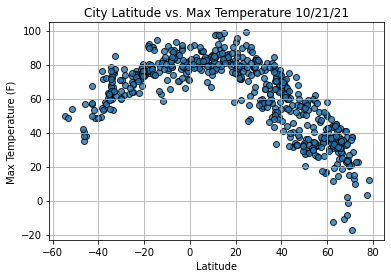

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

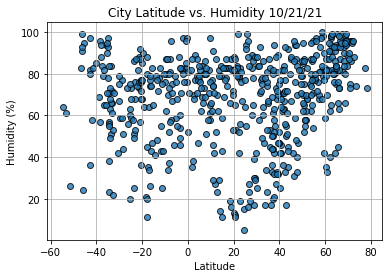

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

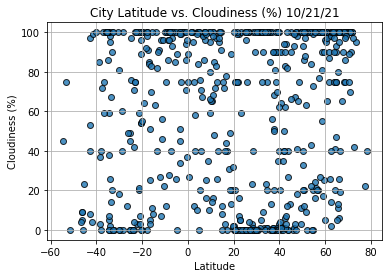

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

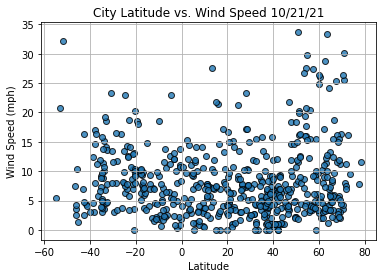

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

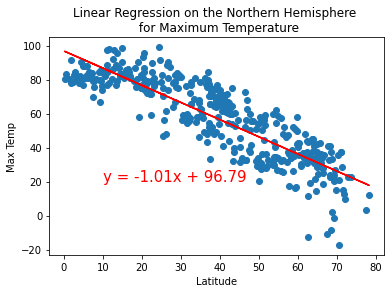

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,20))

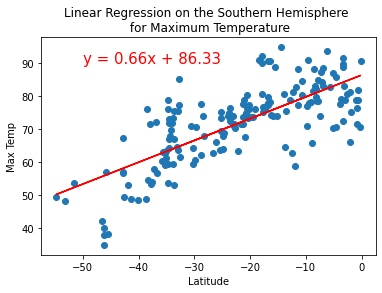

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

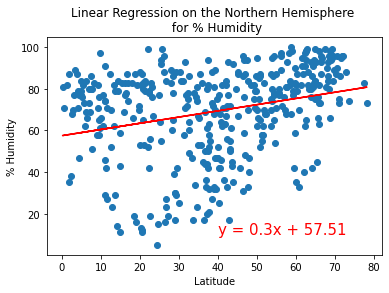

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

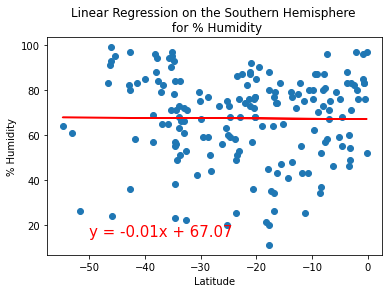

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

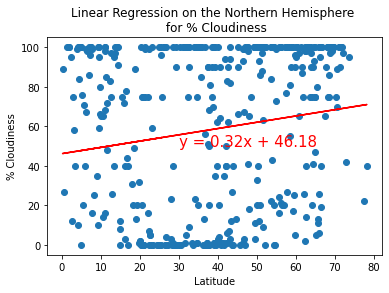

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(30,50))

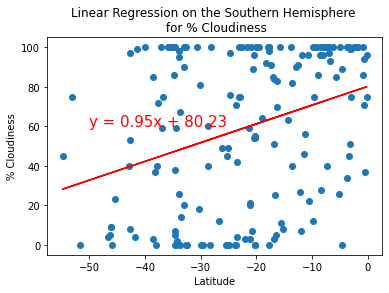

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

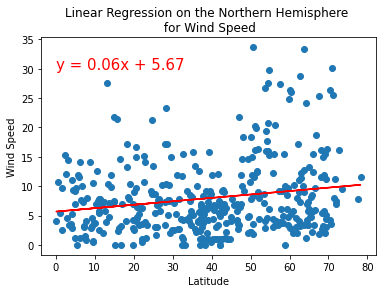

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(0,30))

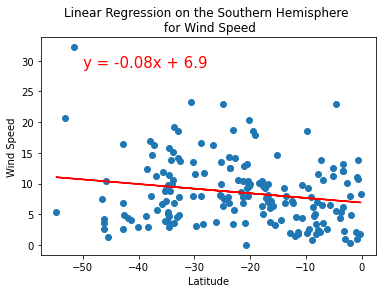

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,29))